# Minorities Participation in the 2008 US Workforce

In [97]:
#Load libries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline



In [98]:

from sklearn import tree      # Import tree classifier 
from sklearn.model_selection import train_test_split     # Import train_test_split function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score      # Import scikit-learn metrics module for accuracy calculation

In [99]:
#load file

location = "YEAR08_US.xlsx"
df = pd.read_excel(location)

In [100]:
df.head()

,STATE_LABEL,full name of US,UNITED STATES,Grouping,Job_Code,Job_Desc,Sex,Race,Measure,Units
0,TOTAL_UNIT,number of total reporting units,250650.0,TOTAL,_,0,Both_Sex,All_Races,Number,NaN
1,TOTAL1,1-Senior OFF AND MGRS/TOTAL,872386.0,TOTAL,1,Senior_MGRS,Both_Sex,All_Races,Number,Total_Job_Race
2,TOTAL2,2-PROF/TOTAL,9292967.0,TOTAL,2,PROF,Both_Sex,All_Races,Number,Total_Job_Race
3,TOTAL3,3-TECH/TOTAL,2946127.0,TOTAL,3,TECH,Both_Sex,All_Races,Number,Total_Job_Race
4,TOTAL4,4-SALE/TOTAL,5775889.0,TOTAL,4,SALE,Both_Sex,All_Races,Number,Total_Job_Race


In [101]:
df.columns

Index(['STATE_LABEL', 'full name of US', 'UNITED STATES', 'Grouping',
       'Job_Code', 'Job_Desc', 'Sex', 'Race', 'Measure', 'Units'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 10 columns):
STATE_LABEL        597 non-null object
full name of US    595 non-null object
UNITED STATES      597 non-null float64
Grouping           595 non-null object
Job_Code           595 non-null object
Job_Desc           595 non-null object
Sex                595 non-null object
Race               595 non-null object
Measure            595 non-null object
Units              594 non-null object
dtypes: float64(1), object(9)
memory usage: 46.7+ KB


In [103]:
df["full name of US"].value_counts()

LABORERS (MINORITY)                               2
SALES WORKERS (MINORITY)                          2
TOTAL (MINORITY)                                  2
CRAFT WORKERS (MINORITY)                          2
FEMALE MID OFF AND MGRS                           2
SENIOR OFF AND MGRS (MINORITY)                    2
PROFESSIONALS (MINORITY)                          2
1_2 MID OFF AND MGRS (MINORITY) (PC)              2
MID BLACK OFF AND MGRS                            2
MID OFF AND MGRS (MINORITY)                       2
OPERATIVES (MINORITY)                             2
SERVICE WORKERS (MINORITY)                        2
1.2-Mid OFF AND MGRS/ASIAN/MALE                   2
OFFICE AND CLERICALS (MINORITY)                   2
TECHNICIANS (MINORITY)                            2
3-TECH/BLACK/FEMALE (PCT)                         1
4-SALE/AM-INDIAN-ALK/MALE(PC)                     1
1-Senior OFF AND MGRS/MINORITY/MALE (MINORITY)    1
4-SALE/ASIAN/FEMALE(PCT)                          1
8-LABORS/MIN

In [104]:
df["Grouping"].value_counts()

TOTAL      12
ASIANF     11
TOMRM      11
ASIANM     11
NHOPIF     11
asiantp    11
WHtp       11
WHMp       11
MT         11
tomrMp     11
WHM        11
MinTp      11
MinM       11
FTp        11
tomrtp     11
AIANfp     11
BLKF       11
nhopifp    11
HISPF      11
AIANT      11
FT         11
BLKfp      11
PTOTAL     11
MinT       11
WHF        11
MinF       11
MinFp      11
NHOPIM     11
HISPtp     11
BLKM       11
asianfp    11
AIANF      11
AIANtp     11
HISPT      11
tomrT      11
TOMRF      11
WHfp       11
tomrfp     11
BLKtp      11
MinMp      11
AIANMp     11
HISPM      11
AIANM      11
BLKMp      11
nhopiMp    11
BLKT       11
MTp        11
asianMp    11
ASIANT     11
nhopitp    11
WHT        11
nhopiT     11
HISPfp     11
HISPMp     11
Name: Grouping, dtype: int64

In [105]:
df["Job_Code"].value_counts()

5      54
4      54
3      54
8      54
1      54
6      54
7      54
2      54
9      54
10     54
1_2    54
_       1
Name: Job_Code, dtype: int64

In [106]:
df["Race"].value_counts()

White         66
Black         66
Hispanic      66
Two_Races     66
Indian        66
Hawaiia       66
Minorities    66
Asian         66
All_Races     34
All_races     33
Name: Race, dtype: int64

In [107]:
df["Sex"].value_counts()

Both_Sex    199
Male        198
Female      198
Name: Sex, dtype: int64

In [108]:
df["Measure"].value_counts()

Number     298
Percent    297
Name: Measure, dtype: int64

In [109]:
df["Units"].value_counts()

Partial_Sex       396
Partial_Race      165
Total_Job_Race     22
Partial_race       11
Name: Units, dtype: int64

In [110]:
df["STATE_LABEL"].value_counts()

TOTAL10       1
WHF1_2        1
HISPF1        1
WHfp8         1
HISPfp4       1
AIANM5        1
MinMp2        1
WHMp1_2       1
MT1_2         1
MinMp4        1
HISPM4        1
BLKfp3        1
TOMRF4        1
ASIANT6       1
tomrMp9       1
tomrtp1_2     1
nhopifp1_2    1
BLKF4         1
nhopiT5       1
AIANfp1       1
AIANM7        1
TOMRF3        1
AIANfp4       1
NHOPIM7       1
NHOPIF1_2     1
MinFp8        1
BLKM9         1
nhopiMp8      1
nhopiMp1      1
tomrMp8       1
             ..
nhopiMp4      1
ASIANM10      1
HISPF9        1
NHOPIF2       1
BLKfp10       1
nhopiMp3      1
HISPT4        1
WHF9          1
BLKM1_2       1
FT1           1
nhopiT9       1
ASIANF5       1
PTOTAL7       1
ASIANT7       1
BLKMp1_2      1
WHM9          1
asianMp8      1
HISPMp5       1
asianMp1      1
TOMRF7        1
MinT3         1
asiantp8      1
MinFp3        1
MinT8         1
WHtp9         1
MinFp7        1
BLKT5         1
AIANMp9       1
ASIANT1       1
BLKMp9        1
Name: STATE_LABEL, Lengt

Cleaning: 
1. Delete from col STATE_LABEL the value: TOTAL_UNIT, I, J
3. Replace column name 'UNITED STATES'-> TotalNum
3. Replace column name STATE_LABEL-> Label
3. Replace column name full name of US-> Description
4. Create a df for Percent Measure and another with number and forther split by category of interest in a given col


In [111]:
dfClean = df[df.STATE_LABEL != "TOTAL_UNIT" ]

In [112]:
dfClean = dfClean[dfClean.STATE_LABEL != "I" ]

In [113]:
dfClean2 = dfClean[dfClean.STATE_LABEL != "J" ]

In [114]:
dfClean2.head()

,STATE_LABEL,full name of US,UNITED STATES,Grouping,Job_Code,Job_Desc,Sex,Race,Measure,Units
1,TOTAL1,1-Senior OFF AND MGRS/TOTAL,872386.0,TOTAL,1,Senior_MGRS,Both_Sex,All_Races,Number,Total_Job_Race
2,TOTAL2,2-PROF/TOTAL,9292967.0,TOTAL,2,PROF,Both_Sex,All_Races,Number,Total_Job_Race
3,TOTAL3,3-TECH/TOTAL,2946127.0,TOTAL,3,TECH,Both_Sex,All_Races,Number,Total_Job_Race
4,TOTAL4,4-SALE/TOTAL,5775889.0,TOTAL,4,SALE,Both_Sex,All_Races,Number,Total_Job_Race
5,TOTAL5,5-CLERICALS/TOTAL,6609940.0,TOTAL,5,CLERICALS,Both_Sex,All_Races,Number,Total_Job_Race


In [115]:
dfClean2["STATE_LABEL"].value_counts()

TOTAL10      1
AIANM7       1
WHF1_2       1
BLKF4        1
HISPF1       1
WHfp8        1
HISPfp4      1
AIANM5       1
MinMp2       1
WHMp1_2      1
MT1_2        1
MinMp4       1
HISPM4       1
BLKfp3       1
TOMRF4       1
ASIANT6      1
tomrMp9      1
nhopiT5      1
tomrMp7      1
ASIANF10     1
TOMRM1_2     1
AIANfp1      1
MinF8        1
TOMRF3       1
AIANfp4      1
NHOPIM7      1
NHOPIF1_2    1
MinFp8       1
BLKM9        1
nhopiMp8     1
            ..
MTp2         1
nhopiMp4     1
ASIANM10     1
HISPF9       1
NHOPIF2      1
BLKfp10      1
nhopiMp3     1
HISPT4       1
WHF9         1
BLKM1_2      1
FT1          1
PTOTAL7      1
ASIANT7      1
MinFp3       1
MinT3        1
asianfp6     1
WHM9         1
asianMp8     1
HISPMp5      1
asianMp1     1
TOMRF7       1
BLKMp1_2     1
ASIANT1      1
asiantp8     1
MinT8        1
WHtp9        1
MinFp7       1
BLKT5        1
tomrMp2      1
BLKMp9       1
Name: STATE_LABEL, Length: 594, dtype: int64

In [116]:
dfClean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 1 to 596
Data columns (total 10 columns):
STATE_LABEL        594 non-null object
full name of US    594 non-null object
UNITED STATES      594 non-null float64
Grouping           594 non-null object
Job_Code           594 non-null object
Job_Desc           594 non-null object
Sex                594 non-null object
Race               594 non-null object
Measure            594 non-null object
Units              594 non-null object
dtypes: float64(1), object(9)
memory usage: 51.0+ KB


In [117]:
import seaborn as sns

In [118]:
dfClean2.isnull()

,STATE_LABEL,full name of US,UNITED STATES,Grouping,Job_Code,Job_Desc,Sex,Race,Measure,Units
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False


In [119]:
#Change columns name
# Replace column name 'UNITED STATES'-> TotalNum
# Replace column name STATE_LABEL-> Label
# Replace column name full name of US-> Description

dfClean3 = dfClean2.rename(columns={"UNITED STATES":"Total","STATE_LABEL":"Label", "full name of US":"Description"}, inplace = True)


In [120]:
dfClean2.columns

Index(['Label', 'Description', 'Total', 'Grouping', 'Job_Code', 'Job_Desc',
       'Sex', 'Race', 'Measure', 'Units'],
      dtype='object')

In [121]:
# Create a df for Percent Measure and another with number Column:

dfNumbers = dfClean2[dfClean2.Measure != "Percent" ]

In [122]:
dfNumbers["Measure"].value_counts()

Number    297
Name: Measure, dtype: int64

In [123]:
#dfDCNumeric.shape

dfNumbers.shape


(297, 10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

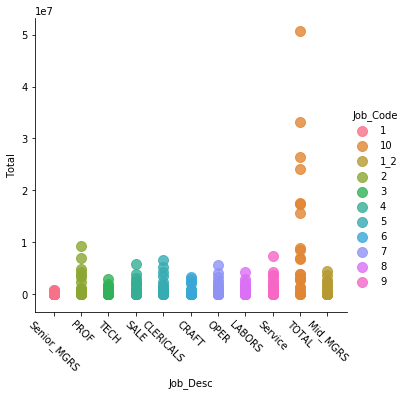

In [124]:
#

sns.lmplot (x="Job_Desc", y="Total", data = dfNumbers, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [125]:
#Creating Dataframes based on specific Groupings
#cust_sell = mainDf[mainDf.Type == 'S']
#cust_buy = mainDf[mainDf.Type == 'P']

dfTotal= dfNumbers[dfNumbers.Grouping == "TOTAL"]


In [126]:
#Deleting the outlier job code = 10  for all groups 
#Groups affected : Total, WHT,BLKT,HIST, ASIANT, AIANT=Indian Total, nhopiT= Hawaiian , tomrT= Two Race Minorities

In [127]:
dfTotal["Grouping"].value_counts()

TOTAL    11
Name: Grouping, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

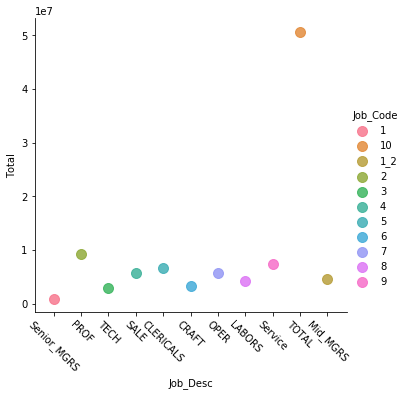

In [128]:
sns.lmplot (x="Job_Desc", y="Total", data = dfTotal, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [129]:
#Zoom in creating a df where  Job Code 10= total is not included

dfTotal1 = dfTotal[dfTotal.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

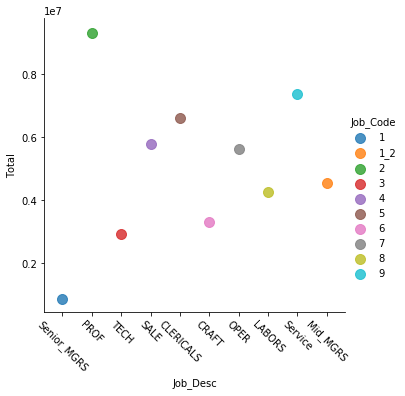

In [130]:
sns.lmplot (x="Job_Desc", y="Total", data = dfTotal1, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

# Comment Workforce by Job Category
Total Distribution of Workforce by Job Category where Professional and Service Job Categories have the highest participation

In [131]:
dfMalesTotal= dfNumbers[dfNumbers.Grouping == "MT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

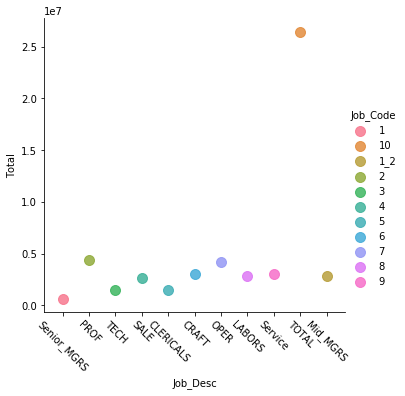

In [132]:
sns.lmplot (x="Job_Desc", y="Total", data = dfMalesTotal, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [133]:
#Zoom in creating a df where  Job Code 10= total is not included

dfMalesTotal1 = dfMalesTotal[dfMalesTotal.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

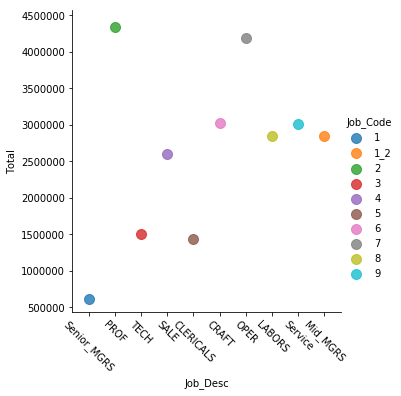

In [134]:
sns.lmplot (x="Job_Desc", y="Total", data = dfMalesTotal1, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

# Comment Males all Races
Job Distribution for Males all Races where Professional and Operational Jobs have the highest participation

In [135]:
dfFemaleTotal= dfNumbers[dfNumbers.Grouping == "FT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

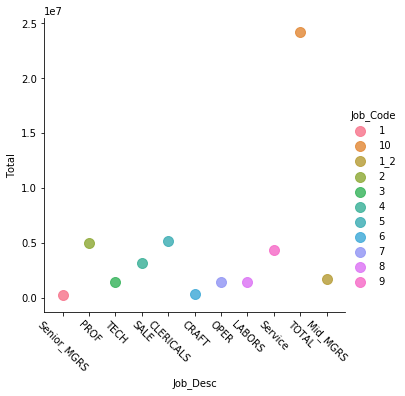

In [136]:
sns.lmplot (x="Job_Desc", y="Total", data = dfFemaleTotal, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [137]:
#Zoom in creating a df where  Job Code 10= total is not included

dfFemaleTotal1 = dfFemaleTotal[dfFemaleTotal.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

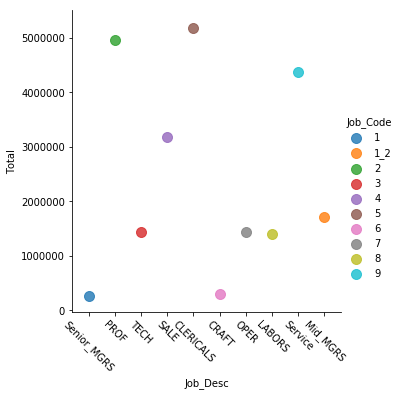

In [138]:
sns.lmplot (x="Job_Desc", y="Total", data = dfFemaleTotal1, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

# Comment Females All Races

Job distribution among Females where Crearical and Professional have the highest participation

In [139]:
#Df for WT= White Total

dfWHitesT= dfNumbers[dfNumbers.Grouping == "WHT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

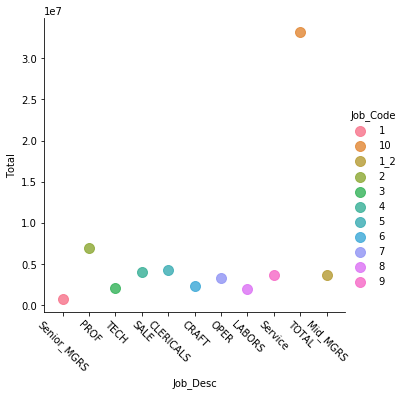

In [140]:
sns.lmplot (x="Job_Desc", y="Total", data = dfWHitesT, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [141]:
#Zoom in creating a df where 10= total is not included

dfWHitesT1 = dfWHitesT[dfWHitesT.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

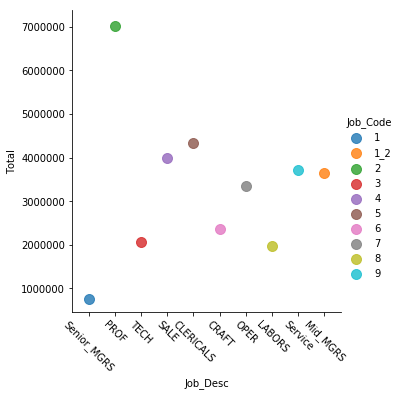

In [142]:
#Zoom in Job Level Distribution in whites. 

sns.lmplot (x="Job_Desc", y="Total", data = dfWHitesT1, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

# Comments Whites All Genders

Job Distribution for Whites where Professional and Clerical have the highest participation.


In [143]:
#Df for WT= Black Total

dfBlacksT= dfNumbers[dfNumbers.Grouping == "BLKT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

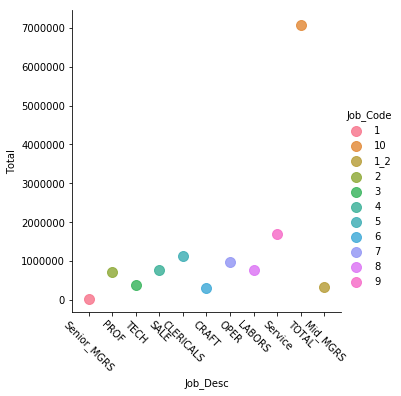

In [144]:
sns.lmplot (x="Job_Desc", y="Total", data = dfBlacksT, fit_reg = False, hue="Job_Code",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [145]:
#Zoom in creating a df where 10= total is not included

dfBlacksT1 = dfBlacksT[dfBlacksT.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

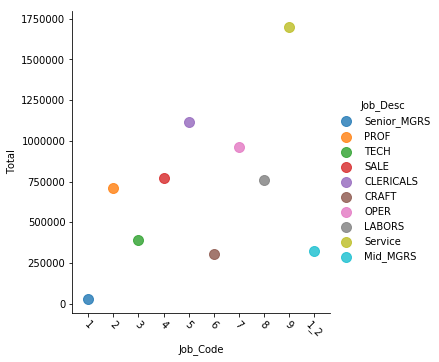

In [146]:
#Zoom in Job Level Distribution in blacks. 

sns.lmplot (x="Job_Code", y="Total", data = dfBlacksT1, fit_reg = False, hue="Job_Desc",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

# Comment Blacks All Genders

Job distribution among Blacks where Service and Clarical jobs have the highest participation

In [147]:
#Df for HISPT= Hispanics Total

dfHispanicsT= dfNumbers[dfNumbers.Grouping == "HISPT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

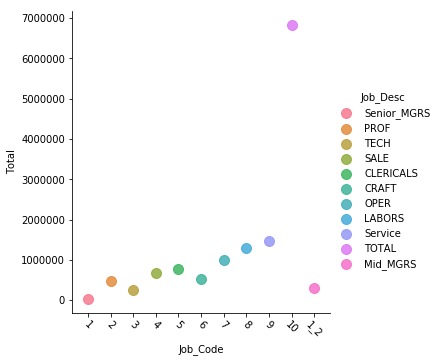

In [148]:
sns.lmplot (x="Job_Code", y="Total", data = dfHispanicsT, fit_reg = False, hue="Job_Desc",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [149]:
#Zoom in creating a df where 10= total is not included

dfHispanicsT1 = dfHispanicsT[dfHispanicsT.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

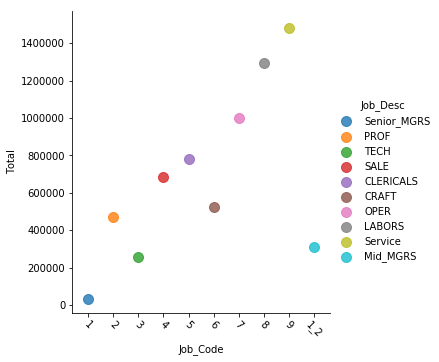

In [150]:
#Zoom in Job Level Distribution in hispanics. 

sns.lmplot (x="Job_Code", y="Total", data = dfHispanicsT1, fit_reg = False, hue="Job_Desc",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [151]:
dfHispanicsT1["Total"].sum()

6823367.0

In [152]:
hispanicsTotalNum= dfHispanicsT1["Total"].sum()

In [153]:
print("Total Hispanics: ", hispanicsTotalNum)

Total Hispanics:  6823367.0


In [154]:
print(dfHispanicsT1)

        Label                    Description      Total Grouping Job_Code  \
100    HISPT1   HISPANIC SENIOR OFF AND MGRS    32963.0    HISPT        1   
101    HISPT2         HISPANIC PROFESSIONALS   468136.0    HISPT        2   
102    HISPT3           HISPANIC TECHNICIANS   257968.0    HISPT        3   
103    HISPT4         HISPANIC SALES WORKERS   683074.0    HISPT        4   
104    HISPT5  HISPANIC OFFICE AND CLERICALS   778109.0    HISPT        5   
105    HISPT6         HISPANIC CRAFT WORKERS   525666.0    HISPT        6   
106    HISPT7            HISPANIC OPERATIVES   997623.0    HISPT        7   
107    HISPT8              HISPANIC LABORERS  1292702.0    HISPT        8   
108    HISPT9       HISPANIC SERVICE WORKERS  1478505.0    HISPT        9   
110  HISPT1_2      HISPANIC MID OFF AND MGRS   308621.0    HISPT      1_2   

        Job_Desc       Sex      Race Measure         Units  
100  Senior_MGRS  Both_Sex  Hispanic  Number  Partial_Race  
101         PROF  Both_Sex  Hi

# Comment Hispanics All Genders

Job distribution among hispanics where Service and Labors have the highest participation
. Graphic suggest an inversed relationship between participation and Job-Skill Demand

In [155]:
#Df for ASIANT= Asian Total

dfAsiansT= dfNumbers[dfNumbers.Grouping == "ASIANT"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

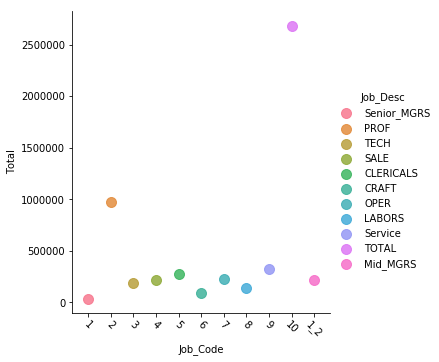

In [156]:
sns.lmplot (x="Job_Code", y="Total", data = dfAsiansT, fit_reg = False, hue="Job_Desc",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [157]:
#Zoom in creating a df where 10= total is not included

dfAsiansT1 = dfAsiansT[dfAsiansT.Job_Desc != "TOTAL" ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

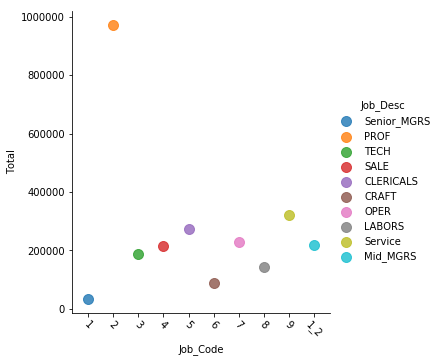

In [158]:
#Zoom in Job Level Distribution in hispanics. 

sns.lmplot (x="Job_Code", y="Total", data = dfAsiansT1, fit_reg = False, hue="Job_Desc",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)

In [159]:
asiansTotalNum= dfAsiansT1["Total"].sum()
print("Total Asians: ", asiansTotalNum)

Total Asians:  2682903.0


# Comment Asians All Genders

Job distribution among Asians where Professional and Service have the highest participation. Professional Jobs are way over represented for this group.

In [160]:
#Creating Dataframes based on specific Race (Minorities, WHite, Black, Asian, Hispanic)
#cust_sell = mainDf[mainDf.Type == 'S']
#cust_buy = mainDf[mainDf.Type == 'P']

dfMinorities= dfNumbers[dfNumbers.Race == "Minorities"]


In [161]:
dfMinorities1 = dfMinorities[dfMinorities.Sex != "Both_Sex" ]
dfMinorities2 = dfMinorities1[dfMinorities1.Job_Desc != "TOTAL" ]

In [162]:
print(dfMinorities2)

       Label                                       Description      Total  \
276    MinF1  1-Senior OFF AND MGRS/MINORITY/FEMALE (MINORITY)    38444.0   
277    MinF2                  2-PROF/MINORITY/FEMALE(MINORITY)  1262855.0   
278    MinF3                  3-TECH/MINORITY/FEMALE(MINORITY)   459667.0   
279    MinF4                  4-SALE/MINORITY/FEMALE(MINORITY)  1062991.0   
280    MinF5             5-CLERICALS/MINORITY/FEMALE(MINORITY)  1731079.0   
281    MinF6                 6-CRAFT/MINORITY/FEMALE(MINORITY)   115371.0   
282    MinF7                  7-OPER/MINORITY/FEMALE(MINORITY)   667181.0   
283    MinF8                8-LABORS/MINORITY/FEMALE(MINORITY)   770235.0   
284    MinF9                9-ServiceMINORITY/FEMALE(MINORITY)  2073538.0   
286  MinF1_2    1.2-mid OFF AND MGRS/MINORITY/FEMALE(MINORITY)   371850.0   
287    MinM1    1-Senior OFF AND MGRS/MINORITY/MALE (MINORITY)    66207.0   
288    MinM2                   2-PROF/MINORITY/MALE (MINORITY)  1017257.0   

Text(0.5, 1.0, '  Job Distribution among Minorities by Gender')

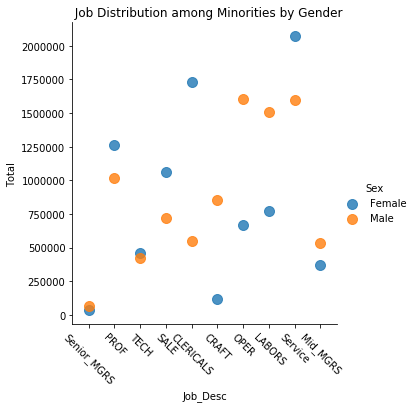

In [163]:
#Zoom in Job Level Distribution in minorities by gender. 

sns.lmplot (x="Job_Desc", y="Total", data = dfMinorities2, fit_reg = False, hue="Sex",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Minorities by Gender')

# Comment Minority by Gender

Job distribution among Minorities (Blacks, Hispanics, Asian, Indians, Hawaiians, and Two Race group) where: 
Minority Females have a higher participation on Professional, Sale, Clarical,and Service jobs

Minority Males have a higher participation on Senior Manager, Craft, Operational,and Mid-Manager jobs


In [164]:
#Creating Dataframes based on specific Race (Minorities, WHite, Black, Asian, Hispanic)
dfWhitesRace= dfNumbers[dfNumbers.Race == "White"]

In [165]:
#Cleaning
dfWhitesRace1 = dfWhitesRace[dfWhitesRace.Sex != "Both_Sex" ]
dfWhitesRace2 = dfWhitesRace1[dfWhitesRace1.Job_Desc != "TOTAL" ]

Text(0.5, 1.0, '  Job Distribution among Whites by Gender')

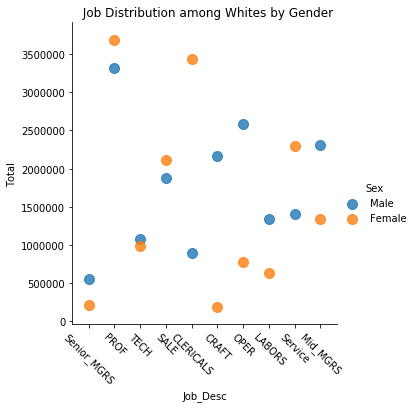

In [166]:
#Zoom in Job Level Distribution in Blacks by gender. 

sns.lmplot (x="Job_Desc", y="Total", data = dfWhitesRace2, fit_reg = False, hue="Sex",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Whites by Gender')

In [167]:
dfWhitesRace2["Total"].groupby(dfWhitesRace2['Sex']).sum()

Sex
Female    15658352.0
Male      17547641.0
Name: Total, dtype: float64

# Comment White by Gender

Job distribution among Whites by gender where Females have a higher participation on Professional, Sales and Clerical jobs.
White Males have a higher participation on Sr ans Mid Managers, Technical, and Operational jobs.
White Males have a higher participation than White Females

In [168]:
#Creating Dataframes based on specific Race (Minorities, WHite, Black, Asian, Hispanic)
dfBlacksRace= dfNumbers[dfNumbers.Race == "Black"]

In [169]:
dfBlacksRace1 = dfBlacksRace[dfBlacksRace.Sex != "Both_Sex" ]
dfBlacksRace2 = dfBlacksRace1[dfBlacksRace1.Job_Desc != "TOTAL" ]

Text(0.5, 1.0, '  Job Distribution among Blacks by Gender')

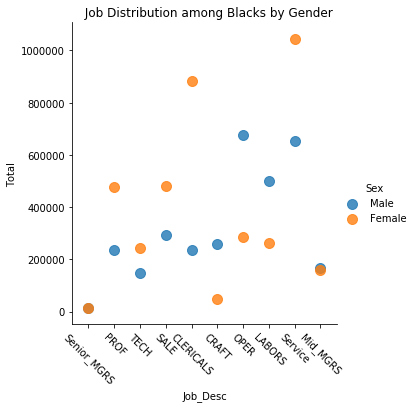

In [170]:
#Zoom in Job Level Distribution in Blacks by gender. 

sns.lmplot (x="Job_Desc", y="Total", data = dfBlacksRace2, fit_reg = False, hue="Sex",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Blacks by Gender')

In [171]:
dfBlacksRace2["Total"].groupby(dfBlacksRace2['Sex']).sum()

Sex
Female    3894463.0
Male      3183555.0
Name: Total, dtype: float64

# Comment Blacks by Gender

Job distribution among Blacks by Gender where Black Females have a higer participation on Senior Manager, Professional, Technical, Sales, Clerical, and Service jobs. Mid-Manager jobs have almost a 50-50 participation.
Black Females have a higher participation than Black Males

In [172]:
#Creating Dataframes based on specific Race (Minorities, WHite, Black, Asian, Hispanic)
dfAsiansRace= dfNumbers[dfNumbers.Race == "Asian"]

In [173]:
dfAsiansRace1 = dfAsiansRace[dfAsiansRace.Sex != "Both_Sex" ]
dfAsiansRace2 = dfAsiansRace1[dfAsiansRace1.Job_Desc != "TOTAL" ]

Text(0.5, 1.0, '  Job Distribution among Asians by Gender')

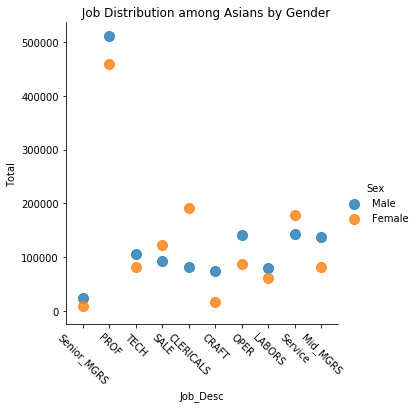

In [174]:
#Zoom in Job Level Distribution in Blacks by gender. 

sns.lmplot (x="Job_Desc", y="Total", data = dfAsiansRace2, fit_reg = False, hue="Sex",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Asians by Gender')

In [175]:
dfAsiansRace2["Total"].groupby(dfAsiansRace2['Sex']).sum()

Sex
Female    1290092.0
Male      1392811.0
Name: Total, dtype: float64

# Comment Asians by Gender

Job distribution among Asians by Gender where Asian Females have a higer participation on Clerical, and Service jobs.
Asian Males have a higher participation on Profesional, Clerical, and Service.
No material gender gap

In [176]:
#Creating Dataframes based on specific Race (Minorities, WHite, Black, Asian, Hispanic)
dfHispanicRace= dfNumbers[dfNumbers.Race == "Hispanic"]

In [177]:
dfHispanicRace1 = dfHispanicRace[dfHispanicRace.Sex != "Both_Sex" ]
dfHispanicRace2 = dfHispanicRace1[dfHispanicRace1.Job_Desc != "TOTAL" ]

Text(0.5, 1.0, '  Job Distribution among Hispanics by Gender')

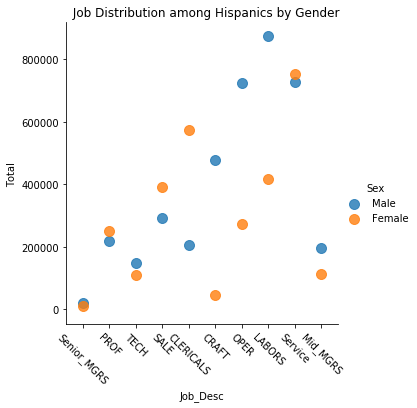

In [178]:
#Zoom in Job Level Distribution in Blacks by gender. 

sns.lmplot (x="Job_Desc", y="Total", data = dfHispanicRace2, fit_reg = False, hue="Sex",scatter_kws={"s": 100} )

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Hispanics by Gender')

In [179]:
dfHispanicRace2["Total"].groupby(dfHispanicRace2['Sex']).sum()

Sex
Female    2934725.0
Male      3888642.0
Name: Total, dtype: float64

# Comment Hispanics by Gender

Job distribution among Hispanics by Gender where Hispanics Females have a higer participation on Clerical,Service, Sales, and Professional jobs.
Hispanic Males have a higher participation on Labor,Operational, and Crafts

Text(0.5, 1.0, '  Job Distribution among Hispanics by Gender')

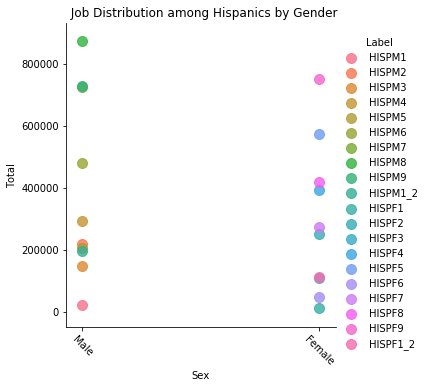

In [180]:
sns.lmplot (x="Sex", y="Total", data = dfHispanicRace2, fit_reg = False, hue="Label",scatter_kws={"s": 100})

plt.xticks (rotation = -45)
plt.title('  Job Distribution among Hispanics by Gender')
